# Milestone 3

## Step 1: Pre-processing

### 1a: Combining pkl files
#### Only run once then use csv

In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, FloatType

Matplotlib created a temporary cache directory at /scratch/msawires1/job_39313752/matplotlib-mp0hsrmz because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


### Chest

In [2]:
# Chest ECG

subject_ids = [f"S{i}" for i in range(2, 18) if i != 12]
base_path = "../ialtamirano/raw_data/WESAD"
chest_ecg_rows = []

for subject in subject_ids:
    file_path = os.path.join(base_path, subject, f"{subject}.pkl")
    with open(file_path, "rb") as f:
        data = pickle.load(f, encoding="latin1")

    signal = data['signal']['chest']['ECG'].flatten()
    labels = data['label']
    N = min(len(signal), len(labels))

    chest_ecg_rows.extend([
        {"subject": subject, "label": int(labels[i]), "value": float(signal[i]), "sample": i}
        for i in range(N) if labels[i] in [1, 2, 3, 4]
    ])

df_chest_ecg = pd.DataFrame(chest_ecg_rows)
print("Chest ECG shape:", df_chest_ecg.shape)
df_chest_ecg.head()


Chest ECG shape: (31470603, 4)


,subject,label,value,sample
0,S2,1,0.030945,214583
1,S2,1,0.033646,214584
2,S2,1,0.033005,214585
3,S2,1,0.031815,214586
4,S2,1,0.030350,214587


In [3]:
#Showing that all subjects and labels are present

label_counts = df_chest_ecg.groupby(['subject', 'label']).size().reset_index(name='count')
print(label_counts)

   subject  label   count
0      S10      1  826000
1      S10      2  507500
2      S10      3  260400
3      S10      4  557200
4      S11      1  826000
5      S11      2  476000
6      S11      3  257600
7      S11      4  553701
8      S13      1  826001
9      S13      2  464800
10     S13      3  267400
11     S13      4  556499
12     S14      1  826000
13     S14      2  472500
14     S14      3  260401
15     S14      4  555800
16     S15      1  822500
17     S15      2  480200
18     S15      3  260400
19     S15      4  555799
20     S16      1  826000
21     S16      2  471101
22     S16      3  257600
23     S16      4  554399
24     S17      1  826700
25     S17      2  506100
26     S17      3  260400
27     S17      4  511700
28      S2      1  800800
29      S2      2  430500
30      S2      3  253400
31      S2      4  537599
32      S3      1  798000
33      S3      2  448000
34      S3      3  262500
35      S3      4  546001
36      S4      1  810601
37      S4  

In [4]:
# Chest EMG

chest_emg_rows = []

for subject in subject_ids:
    file_path = os.path.join(base_path, subject, f"{subject}.pkl")
    with open(file_path, "rb") as f:
        data = pickle.load(f, encoding="latin1")

    signal = data['signal']['chest']['EMG'].flatten()
    labels = data['label']
    N = min(len(signal), len(labels))

    chest_emg_rows.extend([
        {"subject": subject, "label": int(labels[i]), "value": float(signal[i]), "sample": i}
        for i in range(N) if labels[i] in [1, 2, 3, 4]
    ])

df_chest_emg = pd.DataFrame(chest_emg_rows)
print("Chest EMG shape:", df_chest_emg.shape)
df_chest_emg.head()


Chest EMG shape: (31470603, 4)


,subject,label,value,sample
0,S2,1,-0.003708,214583
1,S2,1,-0.014145,214584
2,S2,1,0.010208,214585
3,S2,1,0.012634,214586
4,S2,1,0.002060,214587


In [5]:
#Showing that all subjects and labels are present

label_counts = df_chest_emg.groupby(['subject', 'label']).size().reset_index(name='count')
print(label_counts)

   subject  label   count
0      S10      1  826000
1      S10      2  507500
2      S10      3  260400
3      S10      4  557200
4      S11      1  826000
5      S11      2  476000
6      S11      3  257600
7      S11      4  553701
8      S13      1  826001
9      S13      2  464800
10     S13      3  267400
11     S13      4  556499
12     S14      1  826000
13     S14      2  472500
14     S14      3  260401
15     S14      4  555800
16     S15      1  822500
17     S15      2  480200
18     S15      3  260400
19     S15      4  555799
20     S16      1  826000
21     S16      2  471101
22     S16      3  257600
23     S16      4  554399
24     S17      1  826700
25     S17      2  506100
26     S17      3  260400
27     S17      4  511700
28      S2      1  800800
29      S2      2  430500
30      S2      3  253400
31      S2      4  537599
32      S3      1  798000
33      S3      2  448000
34      S3      3  262500
35      S3      4  546001
36      S4      1  810601
37      S4  

In [6]:
# Chest EDA

chest_eda_rows = []

for subject in subject_ids:
    file_path = os.path.join(base_path, subject, f"{subject}.pkl")
    with open(file_path, "rb") as f:
        data = pickle.load(f, encoding="latin1")

    signal = data['signal']['chest']['EDA'].flatten()
    labels = data['label']
    N = min(len(signal), len(labels))

    chest_eda_rows.extend([
        {"subject": subject, "label": int(labels[i]), "value": float(signal[i]), "sample": i}
        for i in range(N) if labels[i] in [1, 2, 3, 4]
    ])

df_chest_eda = pd.DataFrame(chest_eda_rows)
print("Chest EDA shape:", df_chest_eda.shape)
df_chest_eda.head()


Chest EDA shape: (31470603, 4)


,subject,label,value,sample
0,S2,1,5.710983,214583
1,S2,1,5.719376,214584
2,S2,1,5.706406,214585
3,S2,1,5.712509,214586
4,S2,1,5.727005,214587


In [7]:
#Showing that all subjects and labels are present

label_counts = df_chest_eda.groupby(['subject', 'label']).size().reset_index(name='count')
print(label_counts)

   subject  label   count
0      S10      1  826000
1      S10      2  507500
2      S10      3  260400
3      S10      4  557200
4      S11      1  826000
5      S11      2  476000
6      S11      3  257600
7      S11      4  553701
8      S13      1  826001
9      S13      2  464800
10     S13      3  267400
11     S13      4  556499
12     S14      1  826000
13     S14      2  472500
14     S14      3  260401
15     S14      4  555800
16     S15      1  822500
17     S15      2  480200
18     S15      3  260400
19     S15      4  555799
20     S16      1  826000
21     S16      2  471101
22     S16      3  257600
23     S16      4  554399
24     S17      1  826700
25     S17      2  506100
26     S17      3  260400
27     S17      4  511700
28      S2      1  800800
29      S2      2  430500
30      S2      3  253400
31      S2      4  537599
32      S3      1  798000
33      S3      2  448000
34      S3      3  262500
35      S3      4  546001
36      S4      1  810601
37      S4  

In [8]:
# Chest Temp

chest_temp_rows = []

for subject in subject_ids:
    file_path = os.path.join(base_path, subject, f"{subject}.pkl")
    with open(file_path, "rb") as f:
        data = pickle.load(f, encoding="latin1")

    signal = data['signal']['chest']['Temp'].flatten()
    labels = data['label']
    N = min(len(signal), len(labels))

    chest_temp_rows.extend([
        {"subject": subject, "label": int(labels[i]), "value": float(signal[i]), "sample": i}
        for i in range(N) if labels[i] in [1, 2, 3, 4]
    ])

df_chest_temp = pd.DataFrame(chest_temp_rows)
print("Chest Temp shape:", df_chest_temp.shape)
df_chest_temp.head()


Chest Temp shape: (31470603, 4)


,subject,label,value,sample
0,S2,1,29.083618,214583
1,S2,1,29.122437,214584
2,S2,1,29.115234,214585
3,S2,1,29.126709,214586
4,S2,1,29.100861,214587


In [9]:
#Showing that all subjects and labels are present

label_counts = df_chest_temp.groupby(['subject', 'label']).size().reset_index(name='count')
print(label_counts)

   subject  label   count
0      S10      1  826000
1      S10      2  507500
2      S10      3  260400
3      S10      4  557200
4      S11      1  826000
5      S11      2  476000
6      S11      3  257600
7      S11      4  553701
8      S13      1  826001
9      S13      2  464800
10     S13      3  267400
11     S13      4  556499
12     S14      1  826000
13     S14      2  472500
14     S14      3  260401
15     S14      4  555800
16     S15      1  822500
17     S15      2  480200
18     S15      3  260400
19     S15      4  555799
20     S16      1  826000
21     S16      2  471101
22     S16      3  257600
23     S16      4  554399
24     S17      1  826700
25     S17      2  506100
26     S17      3  260400
27     S17      4  511700
28      S2      1  800800
29      S2      2  430500
30      S2      3  253400
31      S2      4  537599
32      S3      1  798000
33      S3      2  448000
34      S3      3  262500
35      S3      4  546001
36      S4      1  810601
37      S4  

In [10]:
# Chest Resp

chest_resp_rows = []

for subject in subject_ids:
    file_path = os.path.join(base_path, subject, f"{subject}.pkl")
    with open(file_path, "rb") as f:
        data = pickle.load(f, encoding="latin1")

    signal = data['signal']['chest']['Resp'].flatten()
    labels = data['label']
    N = min(len(signal), len(labels))

    chest_resp_rows.extend([
        {"subject": subject, "label": int(labels[i]), "value": float(signal[i]), "sample": i}
        for i in range(N) if labels[i] in [1, 2, 3, 4]
    ])

df_chest_resp = pd.DataFrame(chest_resp_rows)
print("Chest Resp shape:", df_chest_resp.shape)
df_chest_resp.head()


Chest Resp shape: (31470603, 4)


,subject,label,value,sample
0,S2,1,1.191711,214583
1,S2,1,1.139832,214584
2,S2,1,1.141357,214585
3,S2,1,1.155090,214586
4,S2,1,1.133728,214587


In [11]:
#Showing that all subjects and labels are present

label_counts = df_chest_resp.groupby(['subject', 'label']).size().reset_index(name='count')
print(label_counts)

   subject  label   count
0      S10      1  826000
1      S10      2  507500
2      S10      3  260400
3      S10      4  557200
4      S11      1  826000
5      S11      2  476000
6      S11      3  257600
7      S11      4  553701
8      S13      1  826001
9      S13      2  464800
10     S13      3  267400
11     S13      4  556499
12     S14      1  826000
13     S14      2  472500
14     S14      3  260401
15     S14      4  555800
16     S15      1  822500
17     S15      2  480200
18     S15      3  260400
19     S15      4  555799
20     S16      1  826000
21     S16      2  471101
22     S16      3  257600
23     S16      4  554399
24     S17      1  826700
25     S17      2  506100
26     S17      3  260400
27     S17      4  511700
28      S2      1  800800
29      S2      2  430500
30      S2      3  253400
31      S2      4  537599
32      S3      1  798000
33      S3      2  448000
34      S3      3  262500
35      S3      4  546001
36      S4      1  810601
37      S4  

In [12]:
# Chest ACC

chest_acc_rows = []

for subject in subject_ids:
    file_path = os.path.join(base_path, subject, f"{subject}.pkl")
    with open(file_path, "rb") as f:
        data = pickle.load(f, encoding="latin1")

    acc = data['signal']['chest']['ACC']
    labels = data['label']
    N = min(len(acc), len(labels))

    chest_acc_rows.extend([
        {
            "subject": subject,
            "label": int(labels[i]),
            "ACC_x": float(acc[i][0]),
            "ACC_y": float(acc[i][1]),
            "ACC_z": float(acc[i][2]),
            "sample": i
        }
        for i in range(N) if labels[i] in [1, 2, 3, 4]
    ])

df_chest_acc = pd.DataFrame(chest_acc_rows)
print("Chest ACC shape:", df_chest_acc.shape)
df_chest_acc.head()


Chest ACC shape: (31470603, 6)


,subject,label,ACC_x,ACC_y,ACC_z,sample
0,S2,1,0.8914,-0.1102,-0.2576,214583
1,S2,1,0.8926,-0.1086,-0.2544,214584
2,S2,1,0.8930,-0.1094,-0.2580,214585
3,S2,1,0.8934,-0.1082,-0.2538,214586
4,S2,1,0.8930,-0.1096,-0.2570,214587


In [13]:
#Showing that all subjects and labels are present

label_counts = df_chest_acc.groupby(['subject', 'label']).size().reset_index(name='count')
print(label_counts)

   subject  label   count
0      S10      1  826000
1      S10      2  507500
2      S10      3  260400
3      S10      4  557200
4      S11      1  826000
5      S11      2  476000
6      S11      3  257600
7      S11      4  553701
8      S13      1  826001
9      S13      2  464800
10     S13      3  267400
11     S13      4  556499
12     S14      1  826000
13     S14      2  472500
14     S14      3  260401
15     S14      4  555800
16     S15      1  822500
17     S15      2  480200
18     S15      3  260400
19     S15      4  555799
20     S16      1  826000
21     S16      2  471101
22     S16      3  257600
23     S16      4  554399
24     S17      1  826700
25     S17      2  506100
26     S17      3  260400
27     S17      4  511700
28      S2      1  800800
29      S2      2  430500
30      S2      3  253400
31      S2      4  537599
32      S3      1  798000
33      S3      2  448000
34      S3      3  262500
35      S3      4  546001
36      S4      1  810601
37      S4  

### Wrist

In [14]:
# Wrist BVP

wrist_bvp_rows = []

for subject in subject_ids:
    file_path = os.path.join(base_path, subject, f"{subject}.pkl")
    with open(file_path, "rb") as f:
        data = pickle.load(f, encoding="latin1")

    bvp = data['signal']['wrist']['BVP']
    labels = data['label']
    
    # Downsample labels to match BVP length
    factor = len(labels) // len(bvp)
    labels_ds = np.array([np.bincount(labels[i*factor:(i+1)*factor]).argmax() for i in range(len(bvp))])

    wrist_bvp_rows.extend([
        {"subject": subject, "label": int(labels_ds[i]), "value": float(bvp[i]), "sample": i}
        for i in range(len(bvp)) if labels_ds[i] in [1, 2, 3, 4]
    ])

df_wrist_bvp = pd.DataFrame(wrist_bvp_rows)
print("Wrist BVP shape:", df_wrist_bvp.shape)
df_wrist_bvp.head()


Wrist BVP shape: (2857002, 4)


,subject,label,value,sample
0,S2,1,28.52,21458
1,S2,1,-47.98,21459
2,S2,1,-113.26,21460
3,S2,1,-157.08,21461
4,S2,1,-183.70,21462


In [15]:
#Showing that all subjects and labels are present

label_counts = df_wrist_bvp.groupby(['subject', 'label']).size().reset_index(name='count')
print(label_counts)

   subject  label  count
0      S10      1  82600
1      S10      2  50750
2      S10      3  26040
3      S10      4  35214
4      S11      1  82600
5      S11      2  47600
6      S11      3  25760
7      S11      4  34148
8      S13      1  82600
9      S13      2  46479
10     S13      3  26739
11     S13      4  35873
12     S14      1  82600
13     S14      2  47250
14     S14      3  26040
15     S14      4  34598
16     S15      1  82250
17     S15      2  48020
18     S15      3  26040
19     S15      4  36092
20     S16      1  82600
21     S16      2  47110
22     S16      3  25760
23     S16      4  37028
24     S17      1  82670
25     S17      2  50610
26     S17      3  26040
27     S17      4  34324
28      S2      1  80080
29      S2      2  43050
30      S2      3  25340
31      S2      4  31668
32      S3      1  79800
33      S3      2  44800
34      S3      3  26250
35      S3      4  36442
36      S4      1  81060
37      S4      2  44450
38      S4      3  26040


In [16]:
# Wrist EDA

wrist_eda_rows = []

for subject in subject_ids:
    file_path = os.path.join(base_path, subject, f"{subject}.pkl")
    with open(file_path, "rb") as f:
        data = pickle.load(f, encoding="latin1")

    eda = data['signal']['wrist']['EDA']
    labels = data['label']

    factor = len(labels) // len(eda)
    labels_ds = np.array([np.bincount(labels[i*factor:(i+1)*factor]).argmax() for i in range(len(eda))])

    wrist_eda_rows.extend([
        {"subject": subject, "label": int(labels_ds[i]), "value": float(eda[i]), "sample": i}
        for i in range(len(eda)) if labels_ds[i] in [1, 2, 3, 4]
    ])

df_wrist_eda = pd.DataFrame(wrist_eda_rows)
print("Wrist EDA shape:", df_wrist_eda.shape)
df_wrist_eda.head()


Wrist EDA shape: (179832, 4)


,subject,label,value,sample
0,S2,1,1.645664,1226
1,S2,1,1.640539,1227
2,S2,1,1.634132,1228
3,S2,1,1.614912,1229
4,S2,1,1.591848,1230


In [17]:
#Showing that all subjects and labels are present

label_counts = df_wrist_eda.groupby(['subject', 'label']).size().reset_index(name='count')
print(label_counts)

   subject  label  count
0      S10      1   4720
1      S10      2   2900
2      S10      3   1488
3      S10      4   3184
4      S11      1   4720
5      S11      2   2720
6      S11      3   1472
7      S11      4   3164
8      S13      1   4720
9      S13      2   2656
10     S13      3   1528
11     S13      4   3180
12     S14      1   4720
13     S14      2   2700
14     S14      3   1488
15     S14      4   3176
16     S15      1   4700
17     S15      2   2744
18     S15      3   1488
19     S15      4   3176
20     S16      1   4720
21     S16      2   2692
22     S16      3   1472
23     S16      4   3168
24     S17      1   4724
25     S17      2   2892
26     S17      3   1488
27     S17      4   2924
28      S2      1   4576
29      S2      2   2460
30      S2      3   1448
31      S2      4   3072
32      S3      1   4560
33      S3      2   2560
34      S3      3   1500
35      S3      4   3120
36      S4      1   4632
37      S4      2   2540
38      S4      3   1488


In [18]:
# Wrist Temp

wrist_temp_rows = []

for subject in subject_ids:
    file_path = os.path.join(base_path, subject, f"{subject}.pkl")
    with open(file_path, "rb") as f:
        data = pickle.load(f, encoding="latin1")

    temp = data['signal']['wrist']['TEMP']
    labels = data['label']

    factor = len(labels) // len(temp)
    labels_ds = np.array([np.bincount(labels[i*factor:(i+1)*factor]).argmax() for i in range(len(temp))])

    wrist_temp_rows.extend([
        {"subject": subject, "label": int(labels_ds[i]), "value": float(temp[i]), "sample": i}
        for i in range(len(temp)) if labels_ds[i] in [1, 2, 3, 4]
    ])

df_wrist_temp = pd.DataFrame(wrist_temp_rows)
print("Wrist Temp shape:", df_wrist_temp.shape)
df_wrist_temp.head()


Wrist Temp shape: (179832, 4)


,subject,label,value,sample
0,S2,1,35.81,1226
1,S2,1,35.81,1227
2,S2,1,35.81,1228
3,S2,1,35.81,1229
4,S2,1,35.81,1230


In [19]:
#Showing that all subjects and labels are present

label_counts = df_wrist_temp.groupby(['subject', 'label']).size().reset_index(name='count')
print(label_counts)

   subject  label  count
0      S10      1   4720
1      S10      2   2900
2      S10      3   1488
3      S10      4   3184
4      S11      1   4720
5      S11      2   2720
6      S11      3   1472
7      S11      4   3164
8      S13      1   4720
9      S13      2   2656
10     S13      3   1528
11     S13      4   3180
12     S14      1   4720
13     S14      2   2700
14     S14      3   1488
15     S14      4   3176
16     S15      1   4700
17     S15      2   2744
18     S15      3   1488
19     S15      4   3176
20     S16      1   4720
21     S16      2   2692
22     S16      3   1472
23     S16      4   3168
24     S17      1   4724
25     S17      2   2892
26     S17      3   1488
27     S17      4   2924
28      S2      1   4576
29      S2      2   2460
30      S2      3   1448
31      S2      4   3072
32      S3      1   4560
33      S3      2   2560
34      S3      3   1500
35      S3      4   3120
36      S4      1   4632
37      S4      2   2540
38      S4      3   1488


In [20]:
# Wrist ACC

wrist_acc_rows = []

for subject in subject_ids:
    file_path = os.path.join(base_path, subject, f"{subject}.pkl")
    with open(file_path, "rb") as f:
        data = pickle.load(f, encoding="latin1")

    acc = data['signal']['wrist']['ACC']
    labels = data['label']

    factor = len(labels) // len(acc)
    labels_ds = np.array([np.bincount(labels[i*factor:(i+1)*factor]).argmax() for i in range(len(acc))])

    wrist_acc_rows.extend([
        {
            "subject": subject,
            "label": int(labels_ds[i]),
            "ACC_x": float(acc[i][0]),
            "ACC_y": float(acc[i][1]),
            "ACC_z": float(acc[i][2]),
            "sample": i
        }
        for i in range(len(acc)) if labels_ds[i] in [1, 2, 3, 4]
    ])

df_wrist_acc = pd.DataFrame(wrist_acc_rows)
print("Wrist ACC shape:", df_wrist_acc.shape)
df_wrist_acc.head()


Wrist ACC shape: (1481709, 6)


,subject,label,ACC_x,ACC_y,ACC_z,sample
0,S2,1,42.0,-21.0,39.0,10218
1,S2,1,43.0,-22.0,39.0,10219
2,S2,1,43.0,-22.0,41.0,10220
3,S2,1,44.0,-21.0,39.0,10221
4,S2,1,44.0,-21.0,40.0,10222


In [21]:
#Showing that all subjects and labels are present

label_counts = df_wrist_acc.groupby(['subject', 'label']).size().reset_index(name='count')
print(label_counts)

   subject  label  count
0      S10      1  39334
1      S10      2  24166
2      S10      3  12400
3      S10      4  25143
4      S11      1  39333
5      S11      2  22667
6      S11      3  12267
7      S11      4  24236
8      S13      1  39334
9      S13      2  22133
10     S13      3  12733
11     S13      4  25521
12     S14      1  39334
13     S14      2  22500
14     S14      3  12400
15     S14      4  24929
16     S15      1  39167
17     S15      2  22866
18     S15      3  12400
19     S15      4  25189
20     S16      1  39333
21     S16      2  22433
22     S16      3  12267
23     S16      4  26213
24     S17      1  39367
25     S17      2  24100
26     S17      3  12400
27     S17      4  24367
28      S2      1  38134
29      S2      2  20500
30      S2      3  12067
31      S2      4  24343
32      S3      1  38000
33      S3      2  21333
34      S3      3  12500
35      S3      4  26000
36      S4      1  38600
37      S4      2  21167
38      S4      3  12400


### create csv folder

In [23]:
export_path = "combined_pkl_csv"
os.makedirs(export_path, exist_ok=True)

df_chest_ecg.to_csv(f"{export_path}/df_chest_ecg.csv", index=False)
df_chest_emg.to_csv(f"{export_path}/df_chest_emg.csv", index=False)
df_chest_eda.to_csv(f"{export_path}/df_chest_eda.csv", index=False)
df_chest_temp.to_csv(f"{export_path}/df_chest_temp.csv", index=False)
df_chest_resp.to_csv(f"{export_path}/df_chest_resp.csv", index=False)
df_chest_acc.to_csv(f"{export_path}/df_chest_acc.csv", index=False)

df_wrist_bvp.to_csv(f"{export_path}/df_wrist_bvp.csv", index=False)
df_wrist_eda.to_csv(f"{export_path}/df_wrist_eda.csv", index=False)
df_wrist_temp.to_csv(f"{export_path}/df_wrist_temp.csv", index=False)
df_wrist_acc.to_csv(f"{export_path}/df_wrist_acc.csv", index=False)


#### combined csv completed, pull from combined_pkl_csv from here on out

### 1b: Chunking Data into Timeframes

In [3]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import pandas_udf
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, FloatType
from pyspark.sql.functions import col
from pyspark.sql import functions as F
from pyspark.sql.functions import lit
from pyspark.sql.functions import pandas_udf, PandasUDFType
import pandas as pd
import numpy as np
from scipy.stats import mode
import os

In [4]:
from pyspark.sql.functions import pandas_udf
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, FloatType
from pyspark.sql.functions import lit
from pyspark.sql.pandas.functions import PandasUDFType 
import pandas as pd
import numpy as np
from scipy.stats import mode

In [5]:
spark = SparkSession.builder \
    .config("spark.driver.memory", "16g") \
    .config("spark.executor.memory", "16g") \
    .config("spark.executor.instances", 7) \
    .getOrCreate()

schema = StructType([
    StructField("subject", StringType()),
    StructField("modality", StringType()),
    StructField("label", IntegerType()),
    StructField("mean", FloatType()),
    StructField("std", FloatType()),
    StructField("min", FloatType()),
    StructField("max", FloatType())
])

@pandas_udf(schema, functionType=PandasUDFType.GROUPED_MAP)
def chunk_and_compute_stats_udf(pdf):
    pdf = pdf.sort_values("sample")
    signal_values = pdf.drop(columns=["subject", "label", "sample", "modality"]).values
    labels = pdf["label"].values

    chunk_size = 1000
    total_chunks = len(labels) // chunk_size
    if total_chunks == 0:
        return pd.DataFrame(columns=["subject", "modality", "label", "mean", "std", "min", "max"])

    signal_values = signal_values[:total_chunks * chunk_size].reshape(total_chunks, chunk_size, -1)
    label_chunks = labels[:total_chunks * chunk_size].reshape(total_chunks, chunk_size)

    stats_rows = []
    for i in range(total_chunks):
        window = signal_values[i]
        majority_label = mode(label_chunks[i], keepdims=False).mode

        for j in range(window.shape[1]):
            stats_rows.append({
                "subject": pdf['subject'].iloc[0],
                "modality": pdf['modality'].iloc[0],
                "label": int(majority_label),
                "mean": float(np.mean(window[:, j])),
                "std": float(np.std(window[:, j])),
                "min": float(np.min(window[:, j])),
                "max": float(np.max(window[:, j]))
            })

    return pd.DataFrame(stats_rows)

In [6]:
modality_files = [
    "df_chest_ecg.csv",
    "df_chest_emg.csv",
    "df_chest_eda.csv",
    "df_chest_temp.csv",
    "df_chest_resp.csv",
    "df_wrist_bvp.csv",
    "df_wrist_eda.csv",
    "df_wrist_temp.csv"
]

data_dir = "../msawires1/combined_pkl_csv"
all_chunks = []

for file in modality_files:
    file_path = os.path.join(data_dir, file)
    if os.path.exists(file_path):
        modality = file.replace("df_", "").replace(".csv", "")
        print(f"Processing {modality}...")
        
        df = spark.read.csv(file_path, header=True, inferSchema=True)
        df = df.withColumn("modality", lit(modality))
        chunked_df = df.groupBy("subject").apply(chunk_and_compute_stats_udf)
        all_chunks.append(chunked_df)
    else:
        print(f"File not found: {file_path}")

# Union all Spark DataFrames
final_df = all_chunks[0]
for df in all_chunks[1:]:
    final_df = final_df.union(df)

final_df.show()

Processing chest_ecg...


/usr/local/spark/python/pyspark/sql/pandas/group_ops.py:104: UserWarning: It is preferred to use 'applyInPandas' over this API. This API will be deprecated in the future releases. See SPARK-28264 for more details.
  warnings.warn(


Processing chest_emg...
Processing chest_eda...
Processing chest_temp...
Processing chest_resp...
Processing wrist_bvp...
Processing wrist_eda...
Processing wrist_temp...
+-------+---------+-----+-------------+-----------+-----------+----------+
|subject| modality|label|         mean|        std|        min|       max|
+-------+---------+-----+-------------+-----------+-----------+----------+
|    S10|chest_ecg|    1|   0.01168753|0.122706525| -0.4182129|0.63468933|
|    S10|chest_ecg|    1| 0.0039809877| 0.15130818| -0.5663452| 0.7858429|
|    S10|chest_ecg|    1|  0.005229355| 0.14567506|-0.65812683| 0.7099457|
|    S10|chest_ecg|    1| 0.0028832245| 0.12549666|-0.66389465|0.61335754|
|    S10|chest_ecg|    1|-0.0035272979|0.120900325|-0.46110535|0.43327332|
|    S10|chest_ecg|    1| -0.006145569| 0.12726215| -0.5454712| 0.6622925|
|    S10|chest_ecg|    1| 0.0030956727| 0.12389012| -0.5771942|0.68096924|
|    S10|chest_ecg|    1|  0.005852371| 0.11291345|-0.40663147| 0.5336151|
|   

In [7]:
final_df.printSchema()

root
 |-- subject: string (nullable = true)
 |-- modality: string (nullable = true)
 |-- label: integer (nullable = true)
 |-- mean: float (nullable = true)
 |-- std: float (nullable = true)
 |-- min: float (nullable = true)
 |-- max: float (nullable = true)



### 1c: Adding PANAS Questionnaire Data

In [8]:
questionnaire_df = spark.read.csv("all_questionnaires.csv", header=True, inferSchema=True)

In [9]:
questionnaire_df.show(5)
questionnaire_df.printSchema()

+----------+------------+--------------+------------+----------------+----------------+--------------+-------------+------------+------------+------------+-------------+-------------+-----------+---------------+------------------+-------------+-----------+-------------+----------------+---------------+-------------+------------+--------------+----------------+-----------+---------+-------------------+-------------------+-----------------+-----------------+-----------------+--------------------+-----------+-----------+-----------------------+----------------------+--------------+-------------------------+-------------------------+-------------------------------+
|subject_id|condition_id|condition_name|panas_active|panas_distressed|panas_interested|panas_inspired|panas_annoyed|panas_strong|panas_guilty|panas_scared|panas_hostile|panas_excited|panas_proud|panas_irritable|panas_enthusiastic|panas_ashamed|panas_alert|panas_nervous|panas_determined|panas_attentive|panas_jittery|panas_afraid|

In [10]:
questionnaire_df = questionnaire_df.withColumnRenamed("condition_id", "label")

In [11]:
questionnaire_df = questionnaire_df.withColumnRenamed("subject_id", "subject")

In [12]:
questionnaire_df.printSchema()

root
 |-- subject: string (nullable = true)
 |-- label: integer (nullable = true)
 |-- condition_name: string (nullable = true)
 |-- panas_active: integer (nullable = true)
 |-- panas_distressed: integer (nullable = true)
 |-- panas_interested: integer (nullable = true)
 |-- panas_inspired: integer (nullable = true)
 |-- panas_annoyed: integer (nullable = true)
 |-- panas_strong: integer (nullable = true)
 |-- panas_guilty: integer (nullable = true)
 |-- panas_scared: integer (nullable = true)
 |-- panas_hostile: integer (nullable = true)
 |-- panas_excited: integer (nullable = true)
 |-- panas_proud: integer (nullable = true)
 |-- panas_irritable: integer (nullable = true)
 |-- panas_enthusiastic: integer (nullable = true)
 |-- panas_ashamed: integer (nullable = true)
 |-- panas_alert: integer (nullable = true)
 |-- panas_nervous: integer (nullable = true)
 |-- panas_determined: integer (nullable = true)
 |-- panas_attentive: integer (nullable = true)
 |-- panas_jittery: integer (null

In [13]:
final_df = final_df.join(questionnaire_df, on=["subject", "label"], how="left")

In [14]:
#redefine final_df to include self report dat
final_df.printSchema()

root
 |-- subject: string (nullable = true)
 |-- label: integer (nullable = true)
 |-- modality: string (nullable = true)
 |-- mean: float (nullable = true)
 |-- std: float (nullable = true)
 |-- min: float (nullable = true)
 |-- max: float (nullable = true)
 |-- condition_name: string (nullable = true)
 |-- panas_active: integer (nullable = true)
 |-- panas_distressed: integer (nullable = true)
 |-- panas_interested: integer (nullable = true)
 |-- panas_inspired: integer (nullable = true)
 |-- panas_annoyed: integer (nullable = true)
 |-- panas_strong: integer (nullable = true)
 |-- panas_guilty: integer (nullable = true)
 |-- panas_scared: integer (nullable = true)
 |-- panas_hostile: integer (nullable = true)
 |-- panas_excited: integer (nullable = true)
 |-- panas_proud: integer (nullable = true)
 |-- panas_irritable: integer (nullable = true)
 |-- panas_enthusiastic: integer (nullable = true)
 |-- panas_ashamed: integer (nullable = true)
 |-- panas_alert: integer (nullable = true)

In [15]:
num_rows = final_df.count()
num_cols = len(final_df.columns)
print(f"Shape: ({num_rows}, {num_cols})")

Shape: (160518, 46)


In [16]:
summary = final_df.groupBy("subject", "label").count()
summary.show()

+-------+-----+-----+
|subject|label|count|
+-------+-----+-----+
|    S10|    1| 4223|
|    S10|    3| 1328|
|    S10|    2| 2597|
|    S10|    4| 2825|
|     S6|    4| 2789|
|     S6|    3| 1327|
|     S6|    1| 4223|
|     S6|    2| 2324|
|     S8|    2| 2396|
|     S8|    1| 4182|
|     S8|    4| 2827|
|     S8|    3| 1323|
|     S7|    4| 2803|
|     S7|    3| 1333|
|     S7|    1| 4243|
|     S7|    2| 2289|
|     S4|    4| 2868|
|     S4|    2| 2268|
|     S4|    1| 4146|
|     S4|    3| 1328|
+-------+-----+-----+
only showing top 20 rows



In [17]:
print(final_df.columns)

['subject', 'label', 'modality', 'mean', 'std', 'min', 'max', 'condition_name', 'panas_active', 'panas_distressed', 'panas_interested', 'panas_inspired', 'panas_annoyed', 'panas_strong', 'panas_guilty', 'panas_scared', 'panas_hostile', 'panas_excited', 'panas_proud', 'panas_irritable', 'panas_enthusiastic', 'panas_ashamed', 'panas_alert', 'panas_nervous', 'panas_determined', 'panas_attentive', 'panas_jittery', 'panas_afraid', 'panas_stressed', 'panas_frustrated', 'panas_happy', 'panas_sad', 'stai_i_feel_at_ease', 'stai_i_feel_nervous', 'stai_i_am_jittery', 'stai_i_am_relaxed', 'stai_i_am_worried', 'stai_i_feel_pleasant', 'sam_valence', 'sam_arousal', 'sssq_committed_to_goals', 'sssq_wanted_to_succeed', 'sssq_motivated', 'sssq_reflected_about_self', 'sssq_worried_about_others', 'sssq_concerned_about_impression']


In [18]:
#convert to pandas for ML
final_df = final_df.toPandas()

In [19]:
final_df.head(5)

,subject,label,modality,mean,std,min,max,condition_name,panas_active,panas_distressed,...,stai_i_am_worried,stai_i_feel_pleasant,sam_valence,sam_arousal,sssq_committed_to_goals,sssq_wanted_to_succeed,sssq_motivated,sssq_reflected_about_self,sssq_worried_about_others,sssq_concerned_about_impression
0,S10,1,chest_ecg,0.011688,0.122707,-0.418213,0.634689,baseline,2,1,...,1,2,6,2,NaN,NaN,NaN,NaN,NaN,NaN
1,S10,1,chest_ecg,0.003981,0.151308,-0.566345,0.785843,baseline,2,1,...,1,2,6,2,NaN,NaN,NaN,NaN,NaN,NaN
2,S10,1,chest_ecg,0.005229,0.145675,-0.658127,0.709946,baseline,2,1,...,1,2,6,2,NaN,NaN,NaN,NaN,NaN,NaN
3,S10,1,chest_ecg,0.002883,0.125497,-0.663895,0.613358,baseline,2,1,...,1,2,6,2,NaN,NaN,NaN,NaN,NaN,NaN
4,S10,1,chest_ecg,-0.003527,0.120900,-0.461105,0.433273,baseline,2,1,...,1,2,6,2,NaN,NaN,NaN,NaN,NaN,NaN


# Model 1
### Model with PANAS self report questionnaires 

In [20]:
from pyspark.sql import SparkSession
import os
import csv
import pickle
import numpy as np
from pyspark.sql.functions import col
from pyspark.sql.types import StructType, StructField, StringType, FloatType, IntegerType
from pyspark.sql import Row
from scipy.stats import mode

In [21]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
# Label distribution
print("Label distribution:")
print(final_df['label'].value_counts(normalize=True))

# Basic stats per label
print("\nMean statistics per label:")
print(final_df.groupby('label').mean(numeric_only=True))

# Check NaNs or weird values
print("\nMissing values:")
print(final_df.isnull().sum())

Label distribution:
label
1    0.392672
4    0.261167
2    0.222069
3    0.124092
Name: proportion, dtype: float64

Mean statistics per label:
           mean       std       min        max  panas_active  \
label                                                          
1      7.360125  1.193495  3.391013  11.054914      1.531278   
2      7.885391  1.545908  2.744271  12.818792      2.732396   
3      7.577632  1.275973  3.274309  11.551105      2.944174   
4      7.689933  0.911904  4.572257  10.587931      1.201756   

       panas_distressed  panas_interested  panas_inspired  panas_annoyed  \
label                                                                      
1              1.132125          3.532897        2.132363       1.065777   
2              1.454048          3.586153        3.139539       1.190765   
3              1.734374          2.938300        2.396405       1.668959   
4              1.199442          2.262201        1.800153       1.135490   

       panas_st

In [23]:
# Remove NaN 
final_df = final_df.dropna(axis=1)

In [24]:
# Check for NaNs or weird values
print("\nMissing values:")
print(final_df.isnull().sum())


Missing values:
subject                 0
label                   0
modality                0
mean                    0
std                     0
min                     0
max                     0
condition_name          0
panas_active            0
panas_distressed        0
panas_interested        0
panas_inspired          0
panas_annoyed           0
panas_strong            0
panas_guilty            0
panas_scared            0
panas_hostile           0
panas_excited           0
panas_proud             0
panas_irritable         0
panas_enthusiastic      0
panas_ashamed           0
panas_alert             0
panas_determined        0
panas_attentive         0
panas_jittery           0
panas_afraid            0
panas_stressed          0
panas_frustrated        0
panas_happy             0
panas_sad               0
stai_i_feel_at_ease     0
stai_i_feel_nervous     0
stai_i_am_jittery       0
stai_i_am_relaxed       0
stai_i_am_worried       0
stai_i_feel_pleasant    0
sam_valence          

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GroupShuffleSplit
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pandas as pd
import numpy as np

# drop  unneeded columns
X = final_df.drop(columns=["subject", "modality", "condition_name", "label"])
y = final_df["label"]
groups = final_df["subject"]  # <-- use this for grouping

#grouped split into train_val and test
gss = GroupShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
train_val_idx, test_idx = next(gss.split(X, y, groups=groups))

X_temp = X.iloc[train_val_idx]
y_temp = y.iloc[train_val_idx]
groups_temp = groups.iloc[train_val_idx]

X_test = X.iloc[test_idx]
y_test = y.iloc[test_idx]

# grouped split train_val into train and validation
gss_val = GroupShuffleSplit(n_splits=5, test_size=0.25, random_state=42)
train_idx, val_idx = next(gss_val.split(X_temp, y_temp, groups=groups_temp))

X_train = X_temp.iloc[train_idx]
y_train = y_temp.iloc[train_idx]

X_val = X_temp.iloc[val_idx]
y_val = y_temp.iloc[val_idx]

# train Random Forest
rf = RandomForestClassifier(
    n_estimators=75,
    random_state=45,
    class_weight='balanced',
    max_depth=10,
    min_samples_leaf=5
)
rf.fit(X_train, y_train)

#predictions
y_train_pred = rf.predict(X_train)
y_val_pred = rf.predict(X_val)
y_test_pred = rf.predict(X_test)

#evaluation
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred))

print("\nConfusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred))

# example predictions
example_df = pd.DataFrame({
    "True Label": y_test[:10].values,
    "Predicted Label": y_test_pred[:10]
})
print("\nExample Predictions:")
print(example_df)

Training Accuracy: 1.0
Validation Accuracy: 0.46539238539238537
Test Accuracy: 0.6128201947528376

Classification Report (Test):
              precision    recall  f1-score   support

           1       0.60      0.34      0.43     12592
           2       0.84      1.00      0.92      7189
           3       1.00      0.67      0.80      3983
           4       0.40      0.67      0.51      8482

    accuracy                           0.61     32246
   macro avg       0.71      0.67      0.66     32246
weighted avg       0.65      0.61      0.60     32246


Confusion Matrix (Test):
[[4223    0    0 8369]
 [   0 7189    0    0]
 [   0 1327 2656    0]
 [2789    0    0 5693]]

Example Predictions:
   True Label  Predicted Label
0           1                4
1           1                4
2           1                4
3           1                4
4           1                4
5           1                4
6           1                4
7           1                4
8           1   

In [26]:
print(X.corrwith(y).sort_values(ascending=False))

panas_hostile           0.201060
panas_happy             0.183852
panas_annoyed           0.121301
stai_i_feel_at_ease     0.115890
panas_frustrated        0.110413
panas_distressed        0.085709
panas_sad               0.079139
stai_i_am_worried       0.033839
stai_i_am_relaxed       0.011735
min                     0.011550
sam_arousal             0.009889
mean                    0.008651
panas_irritable        -0.001175
max                    -0.006478
panas_ashamed          -0.011396
panas_jittery          -0.013447
std                    -0.013542
panas_scared           -0.018886
sam_valence            -0.020584
stai_i_am_jittery      -0.032935
panas_active           -0.061431
stai_i_feel_pleasant   -0.068447
panas_afraid           -0.081806
panas_proud            -0.083533
panas_guilty           -0.087959
stai_i_feel_nervous    -0.101053
panas_stressed         -0.103995
panas_inspired         -0.138775
panas_strong           -0.153794
panas_excited          -0.160962
panas_dete

In [27]:
for col in X.columns:
    corr = np.corrcoef(X[col], y)[0, 1]
    print(f"{col}: correlation with label = {corr:.4f}")

mean: correlation with label = 0.0087
std: correlation with label = -0.0135
min: correlation with label = 0.0116
max: correlation with label = -0.0065
panas_active: correlation with label = -0.0614
panas_distressed: correlation with label = 0.0857
panas_interested: correlation with label = -0.5497
panas_inspired: correlation with label = -0.1388
panas_annoyed: correlation with label = 0.1213
panas_strong: correlation with label = -0.1538
panas_guilty: correlation with label = -0.0880
panas_scared: correlation with label = -0.0189
panas_hostile: correlation with label = 0.2011
panas_excited: correlation with label = -0.1610
panas_proud: correlation with label = -0.0835
panas_irritable: correlation with label = -0.0012
panas_enthusiastic: correlation with label = -0.2418
panas_ashamed: correlation with label = -0.0114
panas_alert: correlation with label = -0.4791
panas_determined: correlation with label = -0.1837
panas_attentive: correlation with label = -0.3836
panas_jittery: correlatio

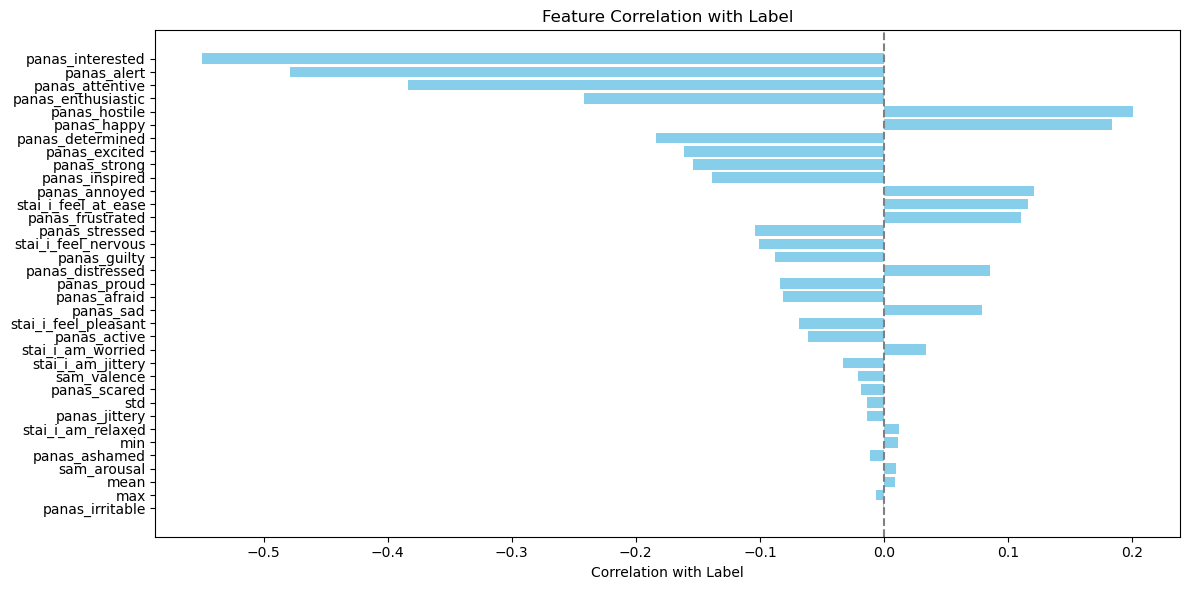

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Compute correlations
correlations = {}
for col in X.columns:
    corr = np.corrcoef(X[col], y)[0, 1]
    correlations[col] = corr

corr_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['correlation'])
corr_df["abs_correlation"] = corr_df["correlation"].abs()
corr_df = corr_df.sort_values("abs_correlation", ascending=False)

# Plot
plt.figure(figsize=(12, 6))
plt.barh(corr_df.index, corr_df["correlation"], color='skyblue')
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel("Correlation with Label")
plt.title("Feature Correlation with Label")
plt.gca().invert_yaxis()  # Highest correlation at the top
plt.tight_layout()
plt.show()

# Model 2
### Same model, only sensor data

In [41]:
import os
import pandas as pd
import numpy as np
from scipy.stats import mode

data_dir = "../msawires1/combined_pkl_csv"
chunk_size = 1000

modality_files = [
    "df_chest_ecg.csv",
    "df_chest_emg.csv",
    "df_chest_eda.csv",
    "df_chest_temp.csv",
    "df_chest_resp.csv",
    "df_wrist_bvp.csv",
    "df_wrist_eda.csv",
    "df_wrist_temp.csv"
]

In [42]:
from scipy.stats import mode, skew

import numpy as np
import pandas as pd

def chunk_and_compute_stats(df, modality_name, chunk_size=1000):
    grouped = df.groupby("subject")
    stats_rows = []

    for subject, group in grouped:
        group = group.sort_values("sample")
        signal_values = group.drop(columns=["subject", "label", "sample"]).values.flatten()
        labels = group["label"].values

        total_chunks = len(labels) // chunk_size
        if total_chunks == 0:
            continue

        signal_values = signal_values[:total_chunks * chunk_size].reshape(total_chunks, chunk_size)
        label_chunks = labels[:total_chunks * chunk_size].reshape(total_chunks, chunk_size)

        for i in range(total_chunks):
            window = signal_values[i]
            majority_label = mode(label_chunks[i], keepdims=False).mode

            stats_rows.append({
                "chunk_id": i,
                "subject": subject,
                "modality": modality_name,
                "label": int(majority_label),
                "mean": np.mean(window),
                "std": np.std(window),
                "min": np.min(window),
                "max": np.max(window),
                "range": np.max(window) - np.min(window),
                "skewness": skew(window),
                "iqr": np.percentile(window, 75) - np.percentile(window, 25),
                "mode": float(mode(window, keepdims=False).mode),
                "median": np.median(window)
            })

    return pd.DataFrame(stats_rows)


In [43]:
# Final output DataFrame
all_chunks = []

for file in modality_files:
    file_path = os.path.join(data_dir, file)
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        modality = file.replace("df_", "").replace(".csv", "")
        print(f"Processing {modality}...")
        chunked = chunk_and_compute_stats(df, modality)
        all_chunks.append(chunked)
    else:
        print(f"File not found: {file_path}")

# Combine all
final_df = pd.concat(all_chunks, ignore_index=True)
final_df.head()

Processing chest_ecg...
Processing chest_emg...
Processing chest_eda...
Processing chest_temp...
Processing chest_resp...
Processing wrist_bvp...
Processing wrist_eda...
Processing wrist_temp...


,chunk_id,subject,modality,label,mean,std,min,max,range,skewness,iqr,mode,median
0,0,S10,chest_ecg,1,0.011688,0.122707,-0.418213,0.634689,1.052902,-0.346959,0.067474,0.060379,0.036667
1,1,S10,chest_ecg,1,0.003981,0.151308,-0.566345,0.785843,1.352188,0.100272,0.142422,0.056625,0.033325
2,2,S10,chest_ecg,1,0.005229,0.145675,-0.658127,0.709946,1.368073,-0.401125,0.093452,0.066147,0.033234
3,3,S10,chest_ecg,1,0.002883,0.125497,-0.663895,0.613358,1.277252,-1.002028,0.084835,0.039871,0.037743
4,4,S10,chest_ecg,1,-0.003527,0.120900,-0.461105,0.433273,0.894379,-1.385745,0.089642,0.040237,0.034973


In [44]:
final_df.shape

(160518, 13)

In [45]:
summary = final_df.groupby(['subject', 'label']).size().reset_index(name='count')
print(summary)

   subject  label  count
0      S10      1   4223
1      S10      2   2597
2      S10      3   1328
3      S10      4   2825
4      S11      1   4223
5      S11      2   2431
6      S11      3   1313
7      S11      4   2812
8      S13      1   4223
9      S13      2   2376
10     S13      3   1363
11     S13      4   2823
12     S14      1   4223
13     S14      2   2416
14     S14      3   1333
15     S14      4   2812
16     S15      1   4207
17     S15      2   2454
18     S15      3   1328
19     S15      4   2817
20     S16      1   4223
21     S16      2   2406
22     S16      3   1313
23     S16      4   2819
24     S17      1   4228
25     S17      2   2585
26     S17      3   1328
27     S17      4   2596
28      S2      1   4095
29      S2      2   2197
30      S2      3   1293
31      S2      4   2727
32      S3      1   4080
33      S3      2   2289
34      S3      3   1343
35      S3      4   2767
36      S4      1   4146
37      S4      2   2268
38      S4      3   1328


In [46]:
print(final_df.columns)

Index(['chunk_id', 'subject', 'modality', 'label', 'mean', 'std', 'min', 'max',
       'range', 'skewness', 'iqr', 'mode', 'median'],
      dtype='object')


In [49]:
# Label distribution
print("Label distribution:")
print(final_df['label'].value_counts(normalize=True))

# Basic stats per label
print("\nMean statistics per label:")
print(final_df.groupby('label').mean(numeric_only=True))

# Check for NaNs or weird values
print("\nMissing values:")
print(final_df.isnull().sum())

Label distribution:
label
1    0.392672
4    0.261167
2    0.222069
3    0.124092
Name: proportion, dtype: float64

Mean statistics per label:
          chunk_id      mean       std       min        max      range  \
label                                                                    
1       402.309102  7.360124  1.193495  3.391013  11.054914   7.663901   
2      1317.752118  7.885392  1.545908  2.744271  12.818793  10.074522   
3      1268.462724  7.577633  1.275973  3.274309  11.551105   8.276796   
4      1613.086899  7.689933  0.911904  4.572257  10.587930   6.015674   

       skewness       iqr      mode    median  
label                                          
1      0.891177  1.369549  7.158893  7.429680  
2      0.559434  1.704096  7.361974  7.905027  
3      0.787002  1.437817  7.303022  7.628287  
4      0.709883  0.995212  7.440730  7.728628  

Missing values:
chunk_id    0
subject     0
modality    0
label       0
mean        0
std         0
min         0
max      

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pandas as pd

##drop unneeded columns
X = final_df.drop(columns=["subject", "modality", "label", "chunk_id"])
y = final_df["label"]

# split into train+val and test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# split train+val into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)  

#random forest
rf = RandomForestClassifier(n_estimators=100, random_state=45, class_weight='balanced', max_depth=20,     
    min_samples_leaf=3)
rf.fit(X_train, y_train)

#predict on all sets
y_train_pred = rf.predict(X_train)
y_val_pred = rf.predict(X_val)
y_test_pred = rf.predict(X_test)

#evaluation
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred))

# example predictions
example_df = pd.DataFrame({
    "True Label": y_test[:10].values,
    "Predicted Label": y_test_pred[:10]
})
print("\nExample Predictions:")
print(example_df)


Training Accuracy: 0.869951199252414
Validation Accuracy: 0.6696361824071767
Test Accuracy: 0.6746511338151009

Classification Report (Test):
              precision    recall  f1-score   support

           1       0.75      0.73      0.74     12606
           2       0.65      0.64      0.65      7129
           3       0.51      0.51      0.51      3984
           4       0.67      0.70      0.68      8385

    accuracy                           0.67     32104
   macro avg       0.64      0.64      0.64     32104
weighted avg       0.68      0.67      0.67     32104


Example Predictions:
   True Label  Predicted Label
0           3                1
1           1                1
2           3                3
3           2                2
4           4                1
5           4                1
6           1                1
7           2                2
8           1                1
9           2                2


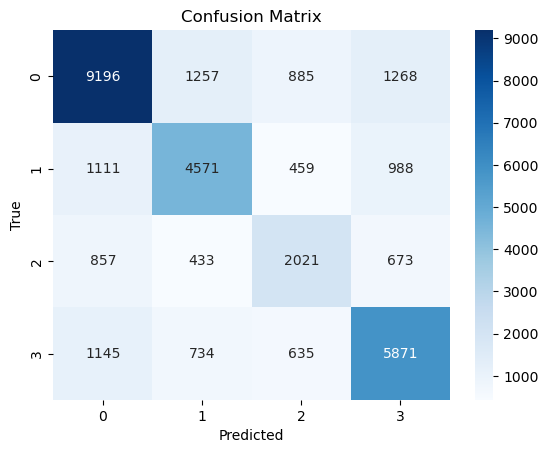

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


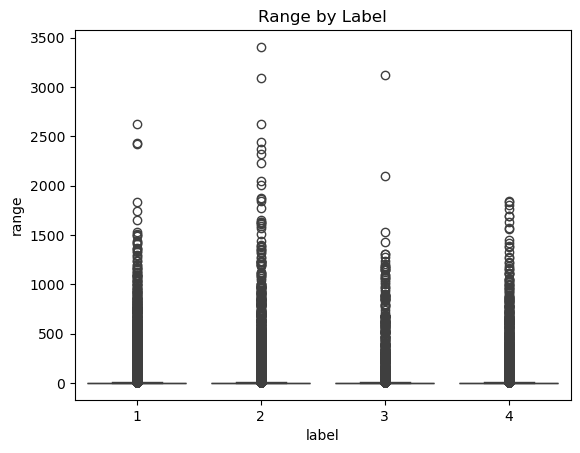

In [59]:
#Looking for any outliers?
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=final_df, x='label', y='range')
plt.title('Range by Label')
plt.show()

In [60]:
# Here we are training the same model, random forest but just  using cross validation to train 
# Cross checking our accuracy 


from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

X = final_df.drop(columns=["subject", "modality", "label", "chunk_id"])
y = final_df["label"]

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    rf = RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        class_weight='balanced',
        max_depth=20,
        min_samples_leaf=3
    )
    rf.fit(X_train, y_train)
    y_val_pred = rf.predict(X_val)
    acc = accuracy_score(y_val, y_val_pred)
    print(f"Fold {fold} Validation Accuracy: {acc:.4f}")
    accuracies.append(acc)

print(f"\nMean CV Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")


Fold 1 Validation Accuracy: 0.6753
Fold 2 Validation Accuracy: 0.6779
Fold 3 Validation Accuracy: 0.6701
Fold 4 Validation Accuracy: 0.6739
Fold 5 Validation Accuracy: 0.6737

Mean CV Accuracy: 0.6742 ± 0.0025


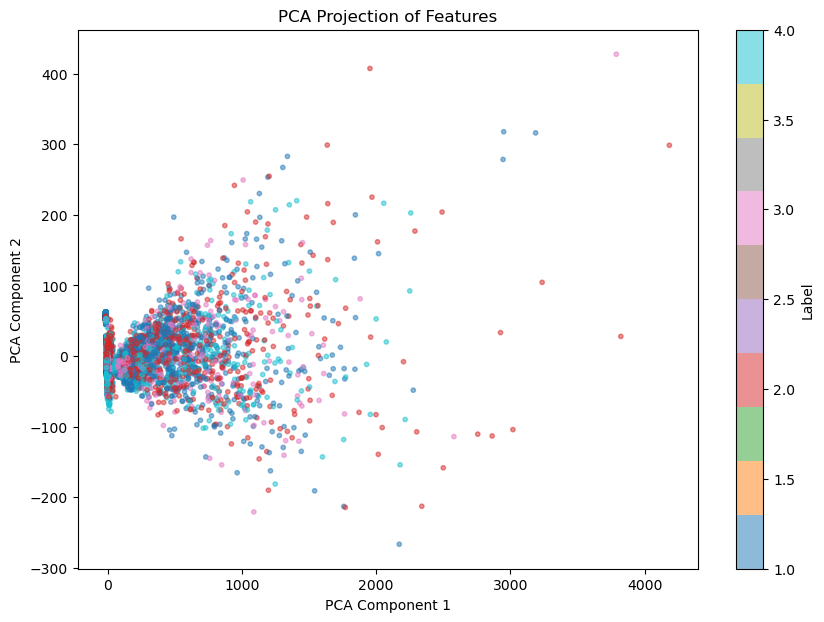

In [61]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#Plotting the first two PCA Compontents to 2D visual 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', alpha=0.5, s=10)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Projection of Features')
plt.colorbar(scatter, label='Label')
plt.show()


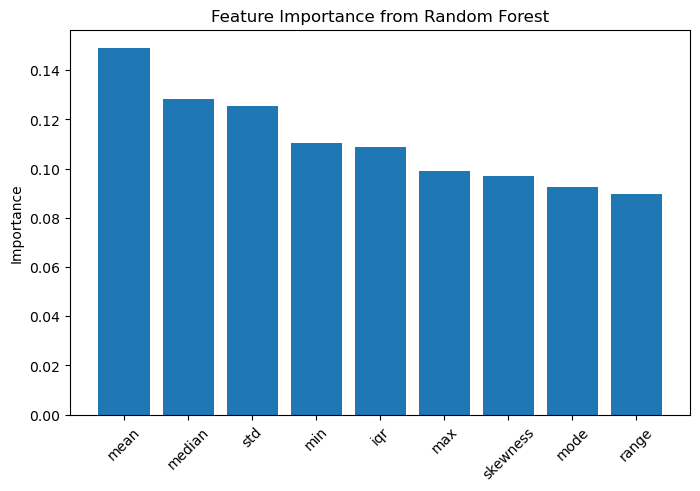

In [62]:
import matplotlib.pyplot as plt
import pandas as pd

# Getting a visual of feature importances from the trained Random Forest
importances = rf.feature_importances_
feature_names = X.columns


feat_imp_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Plot
plt.figure(figsize=(8,5))
plt.bar(feat_imp_df['feature'], feat_imp_df['importance'])
plt.title("Feature Importance from Random Forest")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.show()


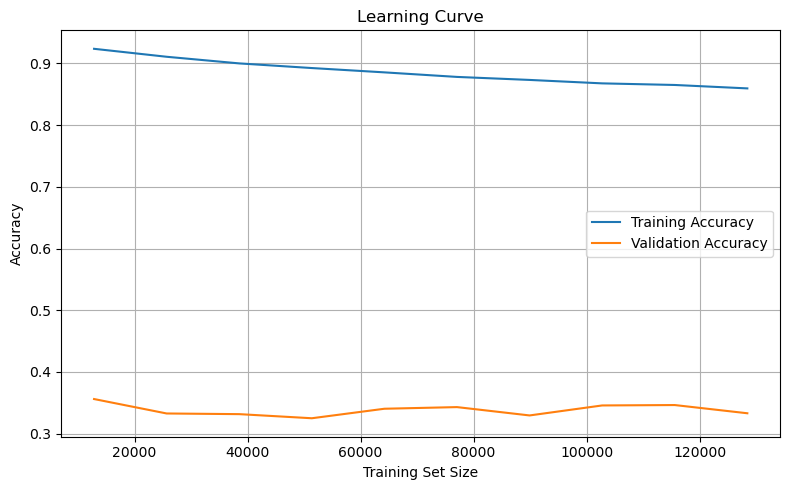

In [63]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np
#learning curve that is suggesting overfitting

model = RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        class_weight='balanced',
        max_depth=20,
        min_samples_leaf=3
    )  
X = final_df.drop(columns=["subject", "modality", "label", "chunk_id"])
y = final_df["label"]

train_sizes, train_scores, val_scores = learning_curve(
    estimator=model,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    shuffle=True,
    random_state=42
)


train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label="Training Accuracy")
plt.plot(train_sizes, val_mean, label="Validation Accuracy")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()